## Задача 1. Минимизация гладкой функции

Рассматриваем функцию f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) на промежутке [1, 30]

Ищем минимум этой функции на заданном промежутке с помощью scipy.optimize.

Указываем в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запускаем из начального приближения x=2. Градиент функции при этом не указываем – он будет оценен численно. 

Затем изменяем начальное приближение на x=30.

Записываем полученные значения функции в точках минимума в файл.

На графике функции видно, что при приближении х=2 мы попадаем в локальный минимум, а при приближении х=30 в глобальный минимум.

In [145]:
import scipy
from scipy.optimize import minimize, differential_evolution
import matplotlib.pylab as plt
import numpy as np

In [99]:
fun = lambda x: (np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.))

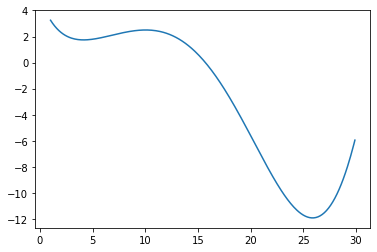

In [146]:
x = np.arange(1, 30, 0.1)
y = fun(x)
plt.plot(x, y)
plt.show()

In [90]:
res = minimize (fun, 2, method='BFGS')
print(res)

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])


In [55]:
res = minimize (fun, 30, method='BFGS')
print(res)

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])


In [30]:
with open('result2.txt', 'w') as fd:
    fd.write('1.75 -11.9')

In [31]:
!more result2.txt

1.75 -11.9


## Задача 2. Глобальная оптимизация

Применяем к этой же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

In [35]:
res1 = differential_evolution (fun, [[1,30]])

In [37]:
res1.x, res1.fun

(array([25.88019868]), -11.898894665971818)

In [40]:
with open('result3.txt', 'w') as fd:
    fd.write('-11.9')

In [41]:
!more result3.txt

-11.9


## Задача 3. Минимизация негладкой функции

Рассматриваем функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Находим минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30.

Находим минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

Видно, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции.

In [126]:
fun2 = lambda x: np.array([int(i) for i in fun(x)])

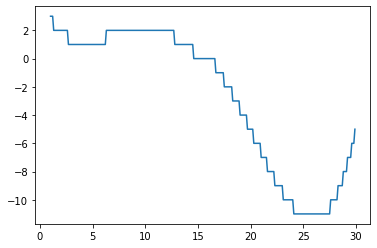

In [147]:
x = np.arange(1, 30, 0.1)
y = fun2(x)
plt.plot(x, y)
plt.show()

In [136]:
res = minimize (fun2, 30, method='BFGS')
print(res)

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


In [129]:
res1 = differential_evolution (fun2, [[1,30]])
print(res1)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([25.97315125])


In [72]:
with open('result4.txt', 'w') as fd:
    fd.write('-5 -11.0')

In [73]:
!more result4.txt

-5 -11.0
